## 1) 데이터 선정 이유 및 문제 정의
- 이커머스에서 비즈니스 개선을 위해 확인해야할 지표 중 LTV가 있습니다. LTV 지표를 통해 비즈니스의 상황을 진단하고 개선하는데 활용하기 위해 데이터를 선정하였습니다.

### LTV(Life Time Value)란?
- 한 마디로 '고객 평생 가치'라고 표현할 수 있습니다. 마케팅 기법이 복잡해지고 구체적으로 변화하며 주목받기 시작한 개념이며, 이커머스의 중요 지표인 영업이익과 연결되는 지표입니다.

### LTV가 중요한 이유
- LTV가 높다는 것은 기업의 기존 고객 기반이 탄탄하다는 것을 의미합니다. 신규 고객의 유입 또한 중요하지만, 대부분의 이커머스 비즈니스에서 영업이익의 80%는 상위 20%의 고객들에게서 나온다고 합니다. 그렇기에 20%의 고객들을 신중하게 판단할 필요가 있으며, 이 판단을 위한 척도로 LTV가 사용될 수 있습니다.

### LTV 산출 방법
- LTV를 산출하는 방식으로는 비즈니스 별로 조금씩 다르게 활용됩니다.
- LTV = (고객의 연간 거래액) X (수익률) X (고객 지속 연수)
- LTV = (고객의 평균 구매 단가) X (평균 구매 횟수)
- LTV = (일평균지불금액) X (지속방문일)
- LTV = (총 영업이익) - (고객에게 들어간 비용)
- 이처럼 다양한 방식으로 LTV를 계산할 수 있습니다.
- 해당 프로젝트에선 마지막 방식인 (총 영업이익) - (고객에게 들어간 비용)을 통해 계산하였으며, 비즈니스의 형태에 따라, 그리고 개선하고자하는 목적에 따라 다른 LTV 산출 방법을 찾아 볼 수 있을 것입니다.

### RFM 개념
- RFM이란 고객이 기업의 수익에 얼마나 기여하는지 판단할 수 있는 개념입니다. 세가지 지표는 다음과 같습니다.
- R(Recency): 고객의 최근성. 고객의 마지막 구매 시점이 언제인지를 나타내는 변수로, 최근에 구매한 고객일수록 현재의 관계가 유의미하다고 판단할 수 있습니다. (산업에 따라 다르게 판단할 필요가 있음)
- F(Frequency): 고객의 구매 빈도. 정해진 기간동안 고객이 얼마나 자주 구매했는지 나타내는 변수. 고객의 활동성을 판단할 수 있습니다.
- M(Monetary): 고객의 구매금액. 정해진 기간동안 고객의 총 구매금액을 나타내는 변수.

### RFM의 목적
- 결국 구매 가능성이 높은 고객을 선정하기 위한 분석단계 중 하나라고 할 수 있습니다.
- 이커머스 데이터를 통해 이 RFM을 구한뒤 데이터분석에 활용해보았습니다.
- R, F, M을 구해서 클러스터링을 통해 점수를 산정하여 활용하였습니다.

### 데이터 설명
- df_items
  - order_id: 주문번호 (prime key)
  - order_item_id: 동일한 주문에 포함된 항목들을 구분하는 식별번호
  - product_id: 상품식별번호
  - seller_id: 판매자 아이디
  - shipping_limit_date: 물류를 주문하기위한 판매자 배송제한 날짜
  - price: 상품 가격
  - freight_value: 물류 운임료
- df_payments
  - order_id: 주문번호 (prime key)
  - payment_sequential: 두 개 이상의 결제 수단을 이용하는 고객들의 시퀀스
  - payment_type: 결제수단
  - payment_installments: 할부 개월 수
  - payment_value: 결제금액
- df_orders
  - order_id: 주문번호 (prime key)
  - customer_id: 고객 아이디
  - order_status: 주문 상태
  - order_purchase_timestamp: 구매날짜
  - order_approved_at: 결제승인 날짜
  - order_delivered_carrier_date: 주문 내역을 물류창고에게 처리한 날짜
  - order_delivered_customer_date: 고객이 실제로 배송받은 날짜
  - order_estimated_delivery_date: 결제 시 고객에게 통지한 예상 배송 날짜

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv


In [3]:
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')

In [4]:
df = pd.merge(df_items, df_payments, how = 'inner', on = 'order_id')

In [5]:
df = pd.merge(df, df_orders, how = 'inner', on = 'order_id')

In [6]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,boleto,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [7]:
#import pandas_profiling

In [8]:
#df.profile_report()

In [9]:
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
dtype: int64

- 결측값은 날짜 관련 데이터에서 볼 수 있다. 하지만 order_delivered_carrier_date는 사용하지 않을 것이니 컬럼을 드랍하려고 한다. 나머지 order_approved_at와 order_delivered_customer_date는 중요하게 작용할 것을 보이기 떄문에 결측값을 제거하여 사용하기로 하였다.

In [10]:
# order_delivered_carrier_date외 무관한 컬럼들 드랍
df = df.drop(['order_delivered_carrier_date', 'shipping_limit_date', 'payment_sequential'], axis = 1)

In [11]:
df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
payment_type                        0
payment_installments                0
payment_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_customer_date    2567
order_estimated_delivery_date       0
dtype: int64

In [12]:
# 결측값 삭제
df = df.dropna(axis = 0)

In [13]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
payment_type                     0
payment_installments             0
payment_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115019 entries, 0 to 117600
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115019 non-null  object 
 1   order_item_id                  115019 non-null  int64  
 2   product_id                     115019 non-null  object 
 3   seller_id                      115019 non-null  object 
 4   price                          115019 non-null  float64
 5   freight_value                  115019 non-null  float64
 6   payment_type                   115019 non-null  object 
 7   payment_installments           115019 non-null  int64  
 8   payment_value                  115019 non-null  float64
 9   customer_id                    115019 non-null  object 
 10  order_status                   115019 non-null  object 
 11  order_purchase_timestamp       115019 non-null  object 
 12  order_approved_at             

In [15]:
df['order_purchase_timestamp']

0         2017-09-13 08:59:02
1         2017-04-26 10:53:06
2         2018-01-14 14:33:31
3         2018-08-08 10:00:35
4         2017-02-04 13:57:51
                 ...         
117596    2018-04-23 13:57:06
117597    2018-07-14 10:26:46
117598    2017-10-23 17:07:56
117599    2017-08-14 23:02:59
117600    2018-06-09 17:00:18
Name: order_purchase_timestamp, Length: 115019, dtype: object

In [16]:
# order_purchase_timestamp, order_approved_at, order_delivered_customer_date, order_estimated_delivery_date 데이터 타입 날짜로 변경
df = df.copy()
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115019 entries, 0 to 117600
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115019 non-null  object        
 1   order_item_id                  115019 non-null  int64         
 2   product_id                     115019 non-null  object        
 3   seller_id                      115019 non-null  object        
 4   price                          115019 non-null  float64       
 5   freight_value                  115019 non-null  float64       
 6   payment_type                   115019 non-null  object        
 7   payment_installments           115019 non-null  int64         
 8   payment_value                  115019 non-null  float64       
 9   customer_id                    115019 non-null  object        
 10  order_status                   115019 non-null  object        
 11  

In [18]:
# 년, 월, 일을 합쳐서 수치로 다루기 위한 작업. 이후 Recency 구할때 필요.
# 혹은 년, 월 만 합쳐서 진행해볼 필요 있음.
df = df.copy()
df['purchase_YMD'] = df['order_purchase_timestamp'].map(lambda date: 10000*date.year + 100*date.month + date.day)
df['approved_YMD'] = df['order_approved_at'].map(lambda date: 10000*date.year + 100*date.month + date.day)
df['delivered_customer_YMD'] = df['order_delivered_customer_date'].map(lambda date: 10000*date.year + 100*date.month + date.day)
df['estimated_delivery_YMD'] = df['order_estimated_delivery_date'].map(lambda date: 10000*date.year + 100*date.month + date.day)

In [19]:
df

,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,purchase_YMD,approved_YMD,delivered_customer_YMD,estimated_delivery_YMD
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,20170913,20170913,20170920,20170929
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15,20170426,20170426,20170512,20170515
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05,20180114,20180114,20180122,20180205
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20,20180808,20180808,20180814,20180820
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17,20170204,20170204,20170301,20170317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-05-10 22:56:40,2018-05-18,20180423,20180425,20180510,20180518
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,boleto,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-23 20:31:55,2018-08-01,20180714,20180717,20180723,20180801
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-28 12:22:22,2017-11-10,20171023,20171024,20171028,20171110
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-16 21:59:40,2017-08-25,20170814,20170815,20170816,20170825


In [20]:
df.customer_id.duplicated().sum()

18558

In [21]:
# 마지막으로 만들 데이터 프레임
# R, F, M 수치 구해서 붙여줄 데이터 프레임
# 먼저 고객 아이디만 저장해두자
df_new = pd.DataFrame(df['customer_id'].unique())
df_new.columns = ['customer_id']
df_new

,customer_id
0,3ce436f183e68e07877b285a838db11a
1,f6dd3ec061db4e3987629fe6b26e5cce
2,6489ae5e4333f3693df5ad4372dab6d3
3,d4eb9395c8c0431ee92fce09860c5a06
4,58dbd0b2d70206bf40e62cd34e84d795
...,...
96456,b51593916b4b8e0d6f66f2ae24f2673d
96457,84c5d4fbaf120aae381fad077416eaa0
96458,29309aa813182aaddc9b259e31b870e6
96459,b5e6afd5a41800fdf401e0272ca74655


### Recency 구하기
- 각 고객별 최근 구매일을 구하여 얼마나 오랜 기간동안 구매이력이 없는지 찾아보자

In [22]:
# 각 고객별 가장 최근 구매일 구하기
# groupby 활용
# 가장 최근 결제 승인 날짜 기준으로 계산
df_recent = df.groupby('customer_id').order_approved_at.max().reset_index()
df_recent.columns = ['customer_id', 'RecentDate']

In [23]:
df_recent

,customer_id,RecentDate
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19
...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 01:35:21
96457,fffecc9f79fd8c764f843e9951b11341,2018-03-29 17:10:27
96458,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:54:37
96459,ffff42319e9b2d713724ae527742af25,2018-06-13 17:20:23


In [24]:
# df_recent에서 max값은 가장 최근영업일로 사용할 수 있다.
#이 값과 각 고객의 최근 구매일의 차이를 Recency로 구해보자
# Recency에서 시간분초 는 지우고 구하기(날짜의 차이만 구하기)
df_recent['Recency'] = (df_recent['RecentDate'].max() - df_recent['RecentDate']).dt.days

In [25]:
df_recent

,customer_id,RecentDate,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147
...,...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 01:35:21,165
96457,fffecc9f79fd8c764f843e9951b11341,2018-03-29 17:10:27,152
96458,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:54:37,99
96459,ffff42319e9b2d713724ae527742af25,2018-06-13 17:20:23,76


In [26]:
# df_new에 Recency 붙이기
df_new = pd.merge(df_new, df_recent[['customer_id', 'Recency']], on = 'customer_id')

In [27]:
df_new

,customer_id,Recency
0,3ce436f183e68e07877b285a838db11a,350
1,f6dd3ec061db4e3987629fe6b26e5cce,490
2,6489ae5e4333f3693df5ad4372dab6d3,227
3,d4eb9395c8c0431ee92fce09860c5a06,21
4,58dbd0b2d70206bf40e62cd34e84d795,571
...,...,...
96456,b51593916b4b8e0d6f66f2ae24f2673d,126
96457,84c5d4fbaf120aae381fad077416eaa0,43
96458,29309aa813182aaddc9b259e31b870e6,308
96459,b5e6afd5a41800fdf401e0272ca74655,379


### k-means clustering을 통해 Recency 점수 산정

In [28]:
#pip install matplotlib --force-reinstall --user

In [29]:
# import matplotlib
# matplotlib.use('TKAgg')
import matplotlib.pyplot as plt

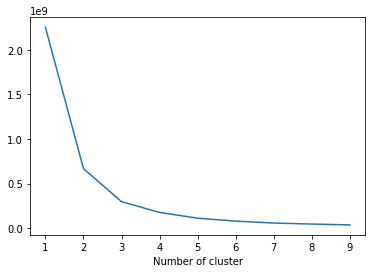

In [30]:
from sklearn.cluster import KMeans

sse={} # error
recency = df_new[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

- 그래프를 통해 3이 최적인 값임을 확인할 수 있다. (이후 4로도 해보면서 모델피팅 진행)

In [31]:
kmeans = KMeans(n_clusters = 6)
df_new['Recency_cluster'] = kmeans.fit_predict(df_new[['Recency']])

In [32]:
df_new

,customer_id,Recency,Recency_cluster
0,3ce436f183e68e07877b285a838db11a,350,4
1,f6dd3ec061db4e3987629fe6b26e5cce,490,2
2,6489ae5e4333f3693df5ad4372dab6d3,227,3
3,d4eb9395c8c0431ee92fce09860c5a06,21,5
4,58dbd0b2d70206bf40e62cd34e84d795,571,2
...,...,...,...
96456,b51593916b4b8e0d6f66f2ae24f2673d,126,0
96457,84c5d4fbaf120aae381fad077416eaa0,43,5
96458,29309aa813182aaddc9b259e31b870e6,308,1
96459,b5e6afd5a41800fdf401e0272ca74655,379,4


### 클러스터링 값 무작위 선정
- 위에서 클러스터링 값이 무작위로 선정되어있음을 볼 수 있다. 우린 Recency 값이 클수록 작은 클러스터링 값을 가지도록 해야하기 때문에 이에 맞도록 수정해야한다.
#### Frequency, Monetary 계산시에도 활용

In [33]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_n = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_n = df_n.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_n['index'] = df_n.index
    df_final = pd.merge(df,df_n[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_new = order_cluster('Recency_cluster', 'Recency', df_new, False)

In [34]:
df_new.sort_values(by = df_new.columns[2], ascending = False)

,customer_id,Recency,Recency_cluster
48230,8257e68ea0c6c6bd319175e224c307b7,45,5
54596,afc0bb207419f33368777e5258921f1b,48,5
54582,8357f83328ee3f5e579988844539522d,76,5
54583,b477f334a9885afca3b612c03e0d047d,32,5
54584,f7917f73a6f8e4419346b35286f28732,12,5
...,...,...,...
17607,3b265c5c8b23bd68f30829c0c5a1af06,480,0
17608,5af548de5ac9e4c548c8ace80d97833d,480,0
17609,6feeb77df30ef447c4f061a576768be8,481,0
17610,7203f09913f70084f17236774370f071,507,0


In [35]:
df_new.groupby('Recency_cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_cluster,,,,,,,,
0,10529.0,519.018140,46.348154,459.0,481.0,513.0,546.0,694.0
1,14097.0,398.206356,32.664834,345.0,371.0,397.0,425.0,458.0
2,18170.0,290.439461,26.594018,247.0,270.0,283.0,313.0,344.0
3,18645.0,202.745508,23.317749,163.0,182.0,203.0,223.0,246.0
4,18041.0,122.963084,22.859565,81.0,105.0,123.0,142.0,162.0
5,16979.0,39.432947,22.451236,0.0,21.0,36.0,60.0,80.0


- 0, 1, 2값이 잘 배분되었으며, 분포를 확인해 볼 수 있다.
- 0값: 마지막 주문이 294일 이상
- 1값: 151일과 294일 사이에 마지막 주문
- 2값: 90일 이내에 마지막 주문

### Frequency 구하기

In [36]:
# groupby와 count를 활용해서 frequency 구함
df_freq = df.groupby('customer_id').order_approved_at.count().reset_index()
df_freq.columns = ['customer_id', 'Frequency']

In [37]:
df_freq

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,1
96457,fffecc9f79fd8c764f843e9951b11341,3
96458,fffeda5b6d849fbd39689bb92087f431,1
96459,ffff42319e9b2d713724ae527742af25,1


In [38]:
# df_new에 합치기
df_new = pd.merge(df_new, df_freq, on = 'customer_id')
df_new

,customer_id,Recency,Recency_cluster,Frequency
0,3ce436f183e68e07877b285a838db11a,350,1,1
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1
3,7dd2e283f47deac853cf70f3b63c8d86,387,1,1
4,0c45155afd8ff99622c40824057f9b34,379,1,1
...,...,...,...,...
96456,3f72fbdbb59d2b6db3637e39f881b6fa,134,4,1
96457,79e8c1737d903a4055c4d2aa87661bf7,97,4,1
96458,970ca115b43314d95949db28ed73aa78,160,4,1
96459,ca8374c00203cec663bc1eabf0aaede4,148,4,1


### k-means clustering을 통해 Frequency 점수 산정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

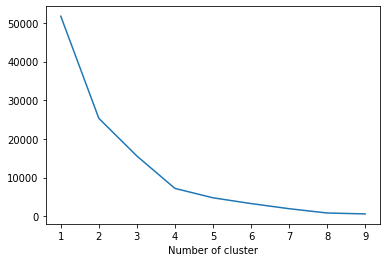

In [39]:
sse={} # error
recency = df_new[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

- 그래프를 통해 4가 최적의 값임을 확인해 볼 수 있다.

In [40]:
kmeans = KMeans(n_clusters = 6)
df_new['Frequency_cluster'] = kmeans.fit_predict(df_new[['Frequency']])

df_new = order_cluster('Frequency_cluster', 'Frequency', df_new, True )
df_new.groupby('Frequency_cluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_cluster,,,,,,,,
0,84226.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
1,9255.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,2311.0,3.331458,0.470839,3.0,3.0,3.0,4.0,4.0
3,592.0,5.839527,0.917728,5.0,5.0,6.0,6.0,9.0
4,76.0,14.000000,5.019960,10.0,11.0,12.0,15.0,38.0
5,1.0,63.000000,NaN,63.0,63.0,63.0,63.0,63.0


### Monetary 구하기

In [41]:
# monetary는 payment_value로 구하였습니다.
df['Monetary'] = df['payment_value']
df_mone = df.groupby('customer_id').Monetary.sum().reset_index()

In [42]:
df_mone

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
96457,fffecc9f79fd8c764f843e9951b11341,81.36
96458,fffeda5b6d849fbd39689bb92087f431,63.13
96459,ffff42319e9b2d713724ae527742af25,214.13


In [43]:
df_new = pd.merge(df_new, df_mone, on = 'customer_id')
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50
3,7dd2e283f47deac853cf70f3b63c8d86,387,1,1,0,236.88
4,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09
...,...,...,...,...,...,...
96456,d22f25a9fadfb1abbc2e29395b1239f4,108,4,24,4,1333.80
96457,9eb3d566e87289dcb0acf28e1407c839,81,4,12,4,2928.24
96458,3b54b5978e9ace64a63f90d176ffb158,108,4,12,4,3630.24
96459,1ff773612ab8934db89fd5afa8afe506,131,4,10,4,30186.00


### k-means clustering을 통해 Monetary 점수 산정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

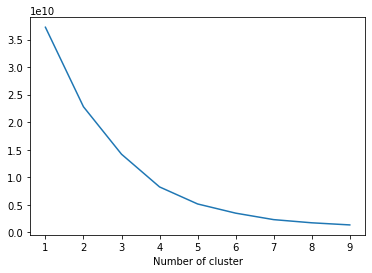

In [44]:
sse={} # error
recency = df_new[['Monetary']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

### Monetary는 클러스터 값으로 LTV를 구분지어볼 것이기에 여러번 구분하자
- 4값으로 clustering

In [45]:
kmeans = KMeans(n_clusters = 10)
df_new['Monetary_cluster'] = kmeans.fit_predict(df_new[['Monetary']])

df_new = order_cluster('Monetary_cluster', 'Monetary', df_new, True )
df_new.groupby('Monetary_cluster')['Monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_cluster,,,,,,,,
0,65202.0,81.787881,37.832314,9.59,50.0000,76.07,111.690,162.45
1,22749.0,244.926151,69.129863,162.47,187.9600,223.54,292.280,421.03
2,5853.0,602.432445,132.795146,421.12,486.4000,576.97,700.890,902.72
3,1815.0,1210.075196,234.419989,903.03,1013.8050,1157.04,1371.990,1775.26
4,611.0,2347.808887,467.079766,1778.01,1972.1550,2176.72,2698.640,3487.50
5,163.0,4655.343620,865.009879,3526.46,3947.1000,4408.08,5328.120,6579.50
6,48.0,8585.406458,1710.370684,6716.48,7325.5275,7904.30,9405.925,12490.88
7,14.0,17634.539286,2606.839193,14196.28,15301.1300,17728.94,19047.535,22346.60
8,5.0,37015.752000,7532.324598,29099.52,30186.0000,36489.24,44048.000,45256.00


In [46]:
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0
...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7


In [59]:
len(df_new.loc[df_new['Monetary_cluster'] == 0])

65202

In [61]:
len(df_new.loc[df_new['Monetary_cluster'] > 0])/len(df_new)

0.3240584277583687

### RFM의 Overall Score 계산
- Overall = a * Recency + b * Frequency + c * Monetary
- 산업군 별로 RFM의 Overall score 계산법은 다르다. 특히 R, F, M에 적용되는 가중치(a, b, c)에 따라 overall이 다르게 측정되는데, 여기선 산업군과 비즈니스 형태를 파악하는데 제한이 있어 가중치를 모두 1로 두고 overall을 계산하였다.

In [47]:
df_new['Overall_score'] = df_new['Recency_cluster'] + df_new['Frequency_cluster'] + df_new['Monetary_cluster']
df_new.groupby('Overall_score')['Recency', 'Frequency', 'Monetary'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Recency,Frequency,Monetary
Overall_score,,,
0,518.565710,1.000000,80.154745
1,422.092588,1.032181,108.012601
2,323.051500,1.061929,124.648783
3,241.993948,1.098087,143.606806
4,166.287999,1.129434,165.846506
5,86.340450,1.155953,175.042963
6,97.764534,1.490581,371.786700
7,105.548970,2.054645,648.765847
8,105.147738,2.648199,1020.350425


In [48]:
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster,Overall_score
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0,1
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0,1
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0,1
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0,1
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0,1
...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7,13
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7,13
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7,13
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7,15


In [49]:
# 금액 비중
total_monetary = df_new.Monetary.sum()

In [50]:
total_monetary

19773588.68

In [51]:
condition = df_new['Monetary_cluster'] > 0
df_new[condition].Monetary.sum()/df_new.Monetary.sum()

0.7303102898365741

In [52]:
df_new[condition].customer_id.count()/df_new.customer_id.count()

0.3240584277583687

### 상위 약 5%의 유저에게서 총 영업이익의 약 37%가 발생하는 것을 볼 수 있다. 그렇기에 상위 5%의 유저들을 잘 구분하는 것이 중요하다.

### Monetary_cluster로 고객 등급 설정

In [53]:
# 상위 18% 고객은 High레벨로 segmentation
df_new['Level'] = 0 # low level
df_new.loc[df_new['Monetary_cluster'] > 0, 'Level'] = 1 # high level

In [54]:
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster,Overall_score,Level
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0,1,0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0,1,0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0,1,0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0,1,0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0,1,0
...,...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7,13,1
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7,13,1
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7,13,1
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7,15,1


In [55]:
df_new.Level.value_counts(normalize = True)

0    0.675942
1    0.324058
Name: Level, dtype: float64

### 주의할 점: Overall_score는 제외하고 모델링 진행해야한다. Data Leakage 발생하기 때문

### baseline은 94.18%로 지정

### 특성들 간의 상관관계이 큰 경우에는 회귀 모델 사용에 제한이 있다. 하지만 트리모델은 상관관계가 많아도 큰 문제없이 사용할 수 있다.

### 이제 df와 df_new를 합쳐서 df_final을 만들어보고, 이 데이터로 모델학습을 진행해보자

In [ ]:
df

,order_id,order_item_id,product_id,seller_id,price,freight_value,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,purchase_YMD,approved_YMD,delivered_customer_YMD,estimated_delivery_YMD,Monetary
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29,20170913,20170913,20170920,20170929,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15,20170426,20170426,20170512,20170515,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05,20180114,20180114,20180122,20180205,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20,20180808,20180808,20180814,20180820,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17,20170204,20170204,20170301,20170317,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,boleto,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-05-10 22:56:40,2018-05-18,20180423,20180425,20180510,20180518,343.40
117597,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,boleto,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-23 20:31:55,2018-08-01,20180714,20180717,20180723,20180801,386.53
117598,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,credit_card,3,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-28 12:22:22,2017-11-10,20171023,20171024,20171028,20171110,116.85
117599,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,credit_card,3,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-16 21:59:40,2017-08-25,20170814,20170815,20170816,20170825,64.71


In [ ]:
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster,Overall_score,Level
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0,1,0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0,1,0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0,1,0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0,1,0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0,1,0
...,...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7,13,1
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7,13,1
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7,13,1
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7,15,1


In [ ]:
# payment_type의 가장 빈번한 값.
# 즉, 각각의 고객이 가장 자주 사용하는 결제수단
df_freq_payment_type = df.groupby('customer_id')['payment_type'].agg(**{'common_payment_type':lambda x:x.mode()}).reset_index()

In [ ]:
df_freq_payment_type

,customer_id,common_payment_type
0,00012a2ce6f8dcda20d059ce98491703,credit_card
1,000161a058600d5901f007fab4c27140,credit_card
2,0001fd6190edaaf884bcaf3d49edf079,credit_card
3,0002414f95344307404f0ace7a26f1d5,boleto
4,000379cdec625522490c315e70c7a9fb,boleto
...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,credit_card
96457,fffecc9f79fd8c764f843e9951b11341,voucher
96458,fffeda5b6d849fbd39689bb92087f431,credit_card
96459,ffff42319e9b2d713724ae527742af25,credit_card


In [ ]:
# 각각의 고객의 평균 할부 개월 수
df_mean_payment_installments = df.groupby('customer_id')['payment_installments'].agg(**{'mean_payment_installments':lambda x:x.mean()}).reset_index()

In [ ]:
df_mean_payment_installments

,customer_id,mean_payment_installments
0,00012a2ce6f8dcda20d059ce98491703,8.0
1,000161a058600d5901f007fab4c27140,5.0
2,0001fd6190edaaf884bcaf3d49edf079,10.0
3,0002414f95344307404f0ace7a26f1d5,1.0
4,000379cdec625522490c315e70c7a9fb,1.0
...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,6.0
96457,fffecc9f79fd8c764f843e9951b11341,1.0
96458,fffeda5b6d849fbd39689bb92087f431,3.0
96459,ffff42319e9b2d713724ae527742af25,2.0


In [ ]:
# 배송 날짜 차이 = 예상 배송 날짜 - 실제 배송 날짜
# 음수의 경우는 배송이 지연 된 경우
df['diff_dates'] = df['estimated_delivery_YMD'] - df['delivered_customer_YMD']

In [ ]:
# 각 고객이 겪은 평균 배송 날짜 차이
df_mean_diff_dates = df.groupby('customer_id')['diff_dates'].agg(**{'mean_diff_dates':lambda x:x.mean()}).reset_index()

In [ ]:
df_mean_diff_dates

,customer_id,mean_diff_dates
0,00012a2ce6f8dcda20d059ce98491703,76.0
1,000161a058600d5901f007fab4c27140,79.0
2,0001fd6190edaaf884bcaf3d49edf079,16.0
3,0002414f95344307404f0ace7a26f1d5,1.0
4,000379cdec625522490c315e70c7a9fb,5.0
...,...,...
96456,fffcb937e9dd47a13f05ecb8290f4d3e,84.0
96457,fffecc9f79fd8c764f843e9951b11341,17.0
96458,fffeda5b6d849fbd39689bb92087f431,21.0
96459,ffff42319e9b2d713724ae527742af25,7.0


In [ ]:
df_new = pd.merge(df_new, df_freq_payment_type, on = 'customer_id')
df_new = pd.merge(df_new, df_mean_payment_installments, on = 'customer_id')
df_new = pd.merge(df_new, df_mean_diff_dates, on = 'customer_id')
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster,Overall_score,Level,common_payment_type,mean_payment_installments,mean_diff_dates
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0,1,0,credit_card,2.0,9.0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0,1,0,boleto,1.0,82.0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0,1,0,credit_card,3.0,4.0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0,1,0,credit_card,4.0,82.0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0,1,0,boleto,1.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7,13,1,credit_card,10.0,13.0
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7,13,1,boleto,1.0,93.0
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7,13,1,credit_card,24.0,14.0
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7,15,1,boleto,1.0,8.0


In [ ]:
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster,Overall_score,Level,common_payment_type,mean_payment_installments,mean_diff_dates
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0,1,0,credit_card,2.0,9.0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0,1,0,boleto,1.0,82.0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0,1,0,credit_card,3.0,4.0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0,1,0,credit_card,4.0,82.0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0,1,0,boleto,1.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7,13,1,credit_card,10.0,13.0
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7,13,1,boleto,1.0,93.0
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7,13,1,credit_card,24.0,14.0
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7,15,1,boleto,1.0,8.0


### common_payment_type에서 가장 많이 쓰인 결제수단이 2개가 같은 값을 가지고 있을 수 있다. 그런 경우들을 방지하기위한 처리가 필요하다.
- 2개 이상 중복될땐, 전체 유저들에게 많이 쓰이는 결제수단 순으로 1개만 남기고 지워준다.
- credit_card, boleto, voucher, debit_card 순으로 많이 쓰인다.

In [ ]:
df['payment_type'].value_counts()

credit_card    84896
boleto         22347
voucher         6123
debit_card      1653
Name: payment_type, dtype: int64

In [ ]:
df_new = df_new.copy()
for i in range(len(df_new['common_payment_type'])):
    if type(df_new['common_payment_type'][i]) is not str:
        df_new['common_payment_type'][i] = df_new['common_payment_type'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df_new['common_payment_type'].value_counts()

credit_card    73940
boleto         19177
voucher         1861
debit_card      1483
Name: common_payment_type, dtype: int64

### Level은 Monetary_cluster로 계산해야한다.
### LTV를 예상해보는 것이다. 앞으로의 LTV는 높을지를 확인해보기위해 RFM을 구하고 그의 점수인 Level을 부여한 것이다. 그렇기에 target은 Monetary_cluster로 정해야한다.

In [ ]:
df_new

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Monetary,Monetary_cluster,Overall_score,Level,common_payment_type,mean_payment_installments,mean_diff_dates
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,72.19,0,1,0,credit_card,2.0,9.0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,112.71,0,1,0,boleto,1.0,82.0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,65.50,0,1,0,credit_card,3.0,4.0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,45.09,0,1,0,credit_card,4.0,82.0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,80.79,0,1,0,boleto,1.0,-101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,22346.60,7,13,1,credit_card,10.0,13.0
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,18667.00,7,13,1,boleto,1.0,93.0
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,14401.00,7,13,1,credit_card,24.0,14.0
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,14963.64,7,15,1,boleto,1.0,8.0


### leakage 방지를 위해 Monetary, Monetary_cluster 드랍해야함

In [ ]:
df_final = df_new.copy()
df_final = df_final.drop(['Monetary'], axis = 1)
df_final = df_final.drop(['Monetary_cluster'], axis = 1)

In [ ]:
#df_final = pd.merge(df_final, df, how = 'outer', on = 'customer_id')

In [ ]:
#df_final = df_final.drop(['Overall_score'], axis = 1)

In [ ]:
#df_final = df_final.drop(['mean_diff_dates'], axis = 1)

In [ ]:
df_final

,customer_id,Recency,Recency_cluster,Frequency,Frequency_cluster,Overall_score,Level,common_payment_type,mean_payment_installments,mean_diff_dates
0,3ce436f183e68e07877b285a838db11a,350,1,1,0,1,0,credit_card,2.0,9.0
1,3773bcf1a6fbd29233ea1c1b573c4f22,379,1,1,0,1,0,boleto,1.0,82.0
2,57ef317d4818cb42680fc9dfd13867ce,351,1,1,0,1,0,credit_card,3.0,4.0
3,0c45155afd8ff99622c40824057f9b34,379,1,1,0,1,0,credit_card,4.0,82.0
4,d96e5c4400413a11fa8c9fd54be4a20b,406,1,1,0,1,0,boleto,1.0,-101.0
...,...,...,...,...,...,...,...,...,...,...
96456,e7d6802668de6e74d0d6c56565bf2a24,330,2,10,4,13,1,credit_card,10.0,13.0
96457,cb87122c4871e202777cf243fbea2d12,327,2,10,4,13,1,boleto,1.0,93.0
96458,78fc46047c4a639e81ff65f0396e02fe,273,2,10,4,13,1,credit_card,24.0,14.0
96459,daf15f1b940cc6a72ba558f093dc00dd,132,4,12,4,15,1,boleto,1.0,8.0


--------------------------------------------------

--------------------------------------------------

--------------------------------------------------

## 모델링

### 데이터가 많아서 주피터, 코랩에서 모두 램이 터진다...일단 모델링을 진행해보기 위해 데이터를 랜덤샘플링 해보았다. (비복원추출로 진행)

In [ ]:
# 2만개 추출
# df_final = df_final.sample(50000)

In [ ]:
df_final = df_final.drop(['customer_id'], axis = 1)

In [ ]:
df_final

,Recency,Recency_cluster,Frequency,Frequency_cluster,Overall_score,Level,common_payment_type,mean_payment_installments,mean_diff_dates
0,350,1,1,0,1,0,credit_card,2.0,9.0
1,379,1,1,0,1,0,boleto,1.0,82.0
2,351,1,1,0,1,0,credit_card,3.0,4.0
3,379,1,1,0,1,0,credit_card,4.0,82.0
4,406,1,1,0,1,0,boleto,1.0,-101.0
...,...,...,...,...,...,...,...,...,...
96456,330,2,10,4,13,1,credit_card,10.0,13.0
96457,327,2,10,4,13,1,boleto,1.0,93.0
96458,273,2,10,4,13,1,credit_card,24.0,14.0
96459,132,4,12,4,15,1,boleto,1.0,8.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = 'Level'
# train, test 데이터 분할
train, test = train_test_split(df_final, test_size=0.2, 
                              stratify=df_final[target], random_state=2)

In [ ]:
# train을 train, val 데이터로 분할
train, val = train_test_split(train, test_size=0.2, 
                              stratify=train[target], random_state=2)

In [ ]:
# 훈련/검증/테스트 데이터 확인
train.shape, val.shape, test.shape

((61734, 9), (15434, 9), (19293, 9))

In [ ]:
train[target].value_counts(normalize = True)

0    0.718227
1    0.281773
Name: Level, dtype: float64

- baseline = 0.7182

In [ ]:
target = 'Level'
features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [ ]:
#!pip install --upgrade category_encoders

In [ ]:
#!pip install xgboost

### 재현율이 중요하다
- positive를 positive로 예측해야 상위 유저들을 구분해낼 수 있기 떄문이다. positive를 nagative로 구분했을 때 영업이익에 큰 손실을 가져올 수 있기 때문이다.
- Recall이 중요하면 Threshold를 낮게 설정, Precision이 중요하면 Threshold를 높게 설정함

In [ ]:
#pip install eli5

In [ ]:
# 데이터 중 인코딩이 필요한 피쳐는 무엇일까
# 결제수단이 있겠다
# 원핫인코딩으로 진행할 것. (Ordinal 인코딩 쓰면 안됨)
from category_encoders import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### 1. 의사결정 나무

In [ ]:
pipe3 = make_pipeline(
    OneHotEncoder(), # common_payment_type을 위해서 
    #SimpleImputer(), 
    DecisionTreeClassifier(min_samples_split=70, 
                           min_samples_leaf=120, 
                           max_depth=6, 
                           random_state=8)
)

pipe3.fit(X_train, y_train)
y_pred = pipe3.predict(X_val)
y_pred_proba = pipe3.predict_proba(X_val)[:, 1]
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('F1-score: ', f1_score(y_val, y_pred))

검증 정확도:  0.8761176623040041
F1-score:  0.7630143777887952


,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.000090,0.430214,1.000000
2,0.000090,0.474362,0.994186
3,0.000180,0.510002,0.993395
4,0.000180,0.524029,0.991342
5,0.000271,0.530007,0.971631
6,0.000361,0.535755,0.967480
7,0.001263,0.543573,0.714932
8,0.027244,0.621522,0.563975
9,0.057826,0.707749,0.501208


In [ ]:
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPR(Recall)': tpr,
    'Threshold': thresholds
})
roc

In [ ]:
# test 정확도
pipe3.fit(X_test, y_test)
y_pred = pipe3.predict(X_test)
y_pred_proba = pipe3.predict_proba(X_test)[:, 1]
print('테스트 정확도: ', accuracy_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

테스트 정확도:  0.8807857772249003
F1-score:  0.7650183898651409


### 1. 랜덤포레스트

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(), # common_payment_type을 위해서 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators = 1000,
                           min_samples_split = 10,
                           min_samples_leaf = 5,
                           max_features = 'auto',
                           max_depth = 10,
                           n_jobs=-1, 
                           random_state=10, 
                           oob_score=True)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('F1-score: ', f1_score(y_val, y_pred))

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPR(Recall)': tpr,
    'Threshold': thresholds
})
roc

검증 정확도:  0.9240637553453415
F1-score:  0.8467573221757322


,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,1.999902
1,0.000000,0.000230,0.999902
2,0.000000,0.061393,0.989121
3,0.000000,0.061853,0.989078
4,0.000000,0.062773,0.988835
...,...,...,...
2821,0.999188,1.000000,0.007869
2822,0.999369,1.000000,0.007820
2823,0.999459,1.000000,0.007817
2824,0.999729,1.000000,0.007798


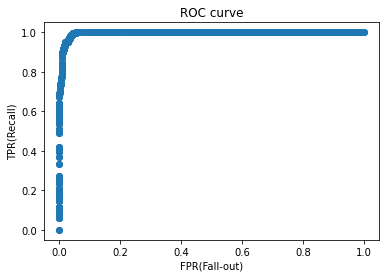

In [ ]:
# ROC curve
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()

In [ ]:
# AUC 점수 계산
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.9959044499572846

In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11085
           1       0.98      0.74      0.85      4349

    accuracy                           0.92     15434
   macro avg       0.94      0.87      0.90     15434
weighted avg       0.93      0.92      0.92     15434



In [ ]:
# test 정확도
pipe.fit(X_test, y_test)
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
print('테스트 정확도: ', accuracy_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

테스트 정확도:  0.925879852796351
F1-score:  0.8510416666666667


- 랜덤포레스트 교차검증(RandomizedSearchCV)활용

In [ ]:
pipe1 = make_pipeline(
    OneHotEncoder(), # common_payment_type을 위해서 
    SimpleImputer(), 
    RandomForestClassifier(class_weight = 'balanced')
)

# 최적값을 구하고 싶은 파라미터 정리 
dists = {
    'randomforestclassifier__max_depth' : [3,5,10,15],
    'randomforestclassifier__max_features' : [3,5,10],
    'randomforestclassifier__n_estimators' : [80, 100, 150, 200]
}

# RandomizedSearchCV 작성
clf1= RandomizedSearchCV(
    pipe1,
    param_distributions=dists, # 파라미터 입력
    n_iter = 80,   # random search 탐색 횟수
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='accuracy',  # 오차 평가방법
    verbose=1,     # 진행상황
    random_state = 2
  )

clf1.fit(X_train, y_train)

print('최적 하이퍼파라미터: ', clf1.best_params_)
y_val_pred = clf1.predict(X_val)
print('검증 정확도:', clf1.best_score_)
print('F1:',f1_score(y_val, y_val_pred))

y_pred_proba = clf1.predict_proba(X_val)[:, 1]
# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPR(Recall)': tpr,
    'Threshold': thresholds
})
roc

Fitting 5 folds for each of 48 candidates, totalling 240 fits
최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__max_features': 10, 'randomforestclassifier__max_depth': 15}
검증 정확도: 0.9991738765857123
F1: 0.9985055753534888


,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.894918,1.000000
2,0.000000,0.911014,0.999987
3,0.000000,0.913543,0.999962
4,0.000000,0.917452,0.999826
...,...,...,...
130,0.135408,1.000000,0.000136
131,0.151737,1.000000,0.000019
132,0.185295,1.000000,0.000017
133,0.220478,1.000000,0.000009


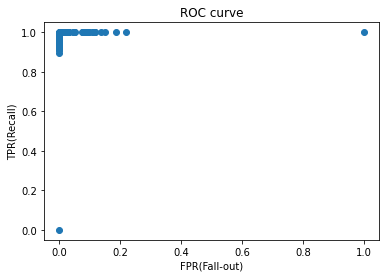

In [ ]:
# ROC curve
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()

In [ ]:
# AUC 점수 계산
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.999996971498796

In [ ]:
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11085
           1       1.00      1.00      1.00      4349

    accuracy                           1.00     15434
   macro avg       1.00      1.00      1.00     15434
weighted avg       1.00      1.00      1.00     15434



In [ ]:
# test 정확도
clf1.fit(X_test, y_test)
print('최적 하이퍼파라미터: ', clf1.best_params_)
y_test_pred = clf1.predict(X_test)
print('테스트 정확도:', clf1.best_score_)
print('F1:',f1_score(y_test, y_test_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 5, 'randomforestclassifier__max_depth': 15}
테스트 정확도: 0.9978230150385322
F1: 1.0


- ### 랜덤포레스트로 검증 정확도와 테스트 정확도를 살펴보았습니다. 이후 XGBClassifier로 결과를 살펴보고자 하였습니다.
- ### 교차검증으로 개선해볼 것

### 2. XGBClassifier

In [ ]:
pipe2 = make_pipeline(
    OneHotEncoder(), # common_payment_type을 위해서 
    #SimpleImputer(), 
    xgb.XGBClassifier(n_estimators = 1000,
                  learning_rate = 0.1,
                  max_depth = 10,
                  use_label_encoder=False,
                  eval_metric='logloss'
                 )
)

pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_val)
y_pred_proba = pipe2.predict_proba(X_val)[:, 1]
print('검증 정확도: ', accuracy_score(y_val, y_pred))
print('F1-score: ', f1_score(y_val, y_pred))

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPR(Recall)': tpr,
    'Threshold': thresholds
})
roc

검증 정확도:  0.9998056239471297
F1-score:  0.9996550534667127


,FPR(Fall-out),TPR(Recall),Threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.060704,1.000000
2,0.000000,0.122097,1.000000
3,0.000000,0.154058,1.000000
4,0.000000,0.169234,1.000000
...,...,...,...
3417,0.999278,1.000000,0.000003
3418,0.999639,1.000000,0.000003
3419,0.999729,1.000000,0.000003
3420,0.999910,1.000000,0.000003


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11085
           1       1.00      1.00      1.00      4349

    accuracy                           1.00     15434
   macro avg       1.00      1.00      1.00     15434
weighted avg       1.00      1.00      1.00     15434



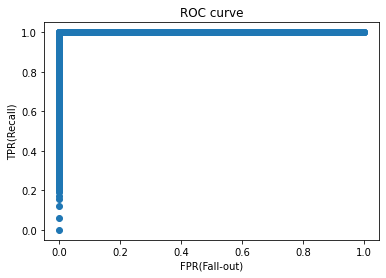

In [ ]:
# ROC curve
import matplotlib.pyplot as plt
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.show()

In [ ]:
# AUC 점수 계산
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.9999998962842054

In [ ]:
# test 정확도
pipe2.fit(X_test, y_test)
y_pred = pipe2.predict(X_test)
y_pred_proba = pipe2.predict_proba(X_test)[:, 1]
print('테스트 정확도: ', accuracy_score(y_test, y_pred))
print('F1-score: ', f1_score(y_test, y_pred))

테스트 정확도:  1.0
F1-score:  1.0


In [ ]:
#pip install shap

In [ ]:
#pip install pdpbox

In [ ]:
import shap
from pdpbox.pdp import pdp_isolate, pdp_plot

In [ ]:
row = X_test.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다
row

,Recency,Recency_cluster,Frequency,Frequency_cluster,Overall_score,common_payment_type,mean_payment_installments,mean_diff_dates
30836,36,5,1,0,5,credit_card,5.0,13.0


In [ ]:
model.predict(row)

In [ ]:
explainer = shap.Explainer(pipe2.predict, X_test)
shap_values = explainer.shap_values(row)

AttributeError: ignored

In [ ]:
model

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['common_payment_type'])),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='logloss', max_depth=10,
                               n_estimators=1000, use_label_encoder=False))])

In [ ]:
explainer = shap.TreeExplainer(pipe2)

Exception: ignored

In [ ]:
explainer = shap.TreeExplainer(clf1)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

Exception: ignored